  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=0230116cd405ce30a3731138d422865fa5e272b90a24c0cec7606f3639b2bd3f
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


Saving bbva.csv to bbva.csv

✅ Dataset Info (Before Preprocessing):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6216 entries, 0 to 6215
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6216 non-null   datetime64[ns]
 1   Close   6216 non-null   float64       
 2   High    6216 non-null   float64       
 3   Low     6216 non-null   float64       
 4   Open    6216 non-null   float64       
 5   Volume  6216 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 291.5 KB
None

🔹 Checking Missing Values Before Handling:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

✅ Dataset Info (After Preprocessing):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6216 entries, 0 to 6215
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6216 non-null   datetim

<ipython-input-1-7dabd472f0f8>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")  # Forward fill missing values



✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            6017 non-null   datetime64[ns]
 1   Close           6017 non-null   float64       
 2   High            6017 non-null   float64       
 3   Low             6017 non-null   float64       
 4   Open            6017 non-null   float64       
 5   Volume          6017 non-null   int64         
 6   RSI             6017 non-null   float64       
 7   MACD            6017 non-null   float64       
 8   MACD_Signal     6017 non-null   float64       
 9   Bollinger_High  6017 non-null   float64       
 10  Bollinger_Low   6017 non-null   float64       
 11  SMA_50          6017 non-null   float64       
 12  SMA_200         6017 non-null   float64       
 13  Daily_Return    6017 non-null   float64       
 14  Volatility      6017 non-null   float64

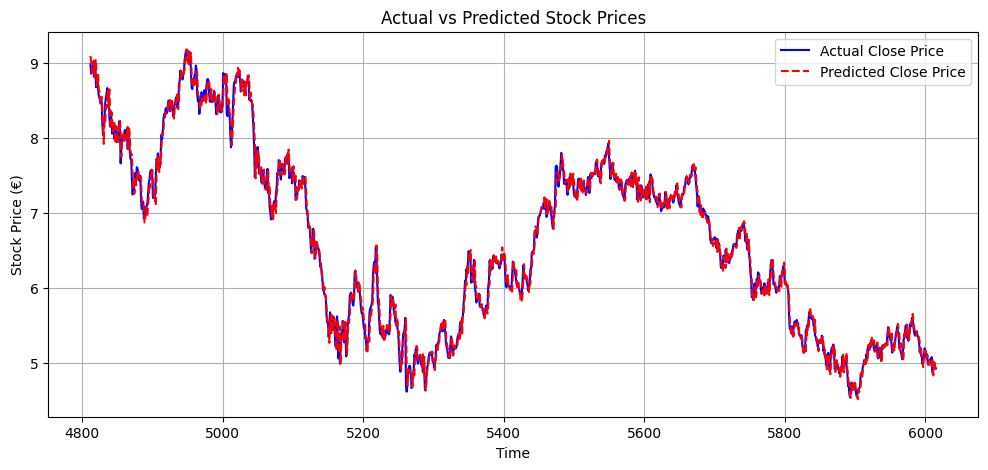

In [1]:
from google.colab import files
import pandas as pd
import io
!pip install ta

# Upload the file manually
uploaded = files.upload()

# Read the uploaded file
file_name = list(uploaded.keys())[0]  # Get the file name dynamically
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")

# Display dataset info before processing
print("\n✅ Dataset Info (Before Preprocessing):")
print(df.info())

# Handle missing values
print("\n🔹 Checking Missing Values Before Handling:")
print(df.isnull().sum())

df = df.fillna(method="ffill")  # Forward fill missing values
df = df.dropna()  # Drop any remaining NaN values (if any)

# Verify dataset after preprocessing
print("\n✅ Dataset Info (After Preprocessing):")
print(df.info())

print("\n🔹 Checking Missing Values After Handling:")
print(df.isnull().sum())

import ta  # Library for technical indicators

# Compute RSI (Relative Strength Index)
df["RSI"] = ta.momentum.RSIIndicator(close=df["Close"], window=14).rsi()

# Compute MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(close=df["Close"])
df["MACD"] = macd.macd()
df["MACD_Signal"] = macd.macd_signal()

# Compute Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=df["Close"], window=20, window_dev=2)
df["Bollinger_High"] = bollinger.bollinger_hband()
df["Bollinger_Low"] = bollinger.bollinger_lband()

# Compute Moving Averages
df["SMA_50"] = df["Close"].rolling(window=50).mean()  # 50-day SMA
df["SMA_200"] = df["Close"].rolling(window=200).mean()  # 200-day SMA

# Compute Daily Price Change %
df["Daily_Return"] = df["Close"].pct_change()

# Compute Volatility (Rolling Standard Deviation of Returns)
df["Volatility"] = df["Daily_Return"].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
df = df.dropna()

# Display dataset info after feature engineering
print("\n✅ Dataset Info (After Feature Engineering):")
print(df.info())

# Show first few rows of the updated dataset
df.head()

# Display dataset info after feature engineering
print("\n✅ Dataset Info (After Feature Engineering):")
print(df.info())

# Save the dataframe to a CSV file
df.to_csv("bbva_featured.csv", index=False)

import pandas as pd

# Load the feature-engineered dataset
file_path = "bbva_featured.csv"
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Display dataset info
print("\n✅ Dataset Info:")
print(df.info())

# Show first few rows
df.head()

#Prepare Data for Training
from sklearn.model_selection import train_test_split

# Create target variable (Next Day Close Price)
df["Close_t+1"] = df["Close"].shift(-1)  # Shift Close column up by 1 day

# Drop last row since it has NaN after shifting
df = df.dropna()

# Select features (all except Date & Close_t+1)
X = df.drop(columns=["Date", "Close", "Close_t+1"])  # Features
y = df["Close_t+1"]  # Target (Next Day Close Price)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display dataset shapes
print("\n✅ Data Split Done:")
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

#Train a Baseline Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display evaluation results
print("\n✅ Model Training Complete:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

#Save the Model for Future Use
import joblib

# Save trained model
joblib.dump(model, "stock_price_model.pkl")

print("✅ Model saved as 'stock_price_model.pkl'.")

#Evaluate the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the saved model
import joblib
model = joblib.load("stock_price_model.pkl")  # Ensure the model is saved in the current directory

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Compute MAPE (Mean Absolute Percentage Error)
mape = (abs((y_test - y_pred) / y_test)).mean() * 100  # Convert to percentage

# Display results
print("\n✅ Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

#Visualize Predictions vs. Actual Prices
import matplotlib.pyplot as plt

# Plot actual vs predicted closing prices
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual Close Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Close Price", color='red', linestyle="dashed")

plt.xlabel("Time")
plt.ylabel("Stock Price (€)")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()





# 📈 Stock Price Prediction - BBVA

## 🔹 Overview
This project builds a **predictive model** to forecast **next-day closing stock prices** using **machine learning**.
We use **technical indicators** (RSI, MACD, Bollinger Bands) and a **Linear Regression model**.

## 📊 Data Preprocessing
- Converted **Date** column to datetime format.
- Filled missing values using **Forward Fill (`ffill`)**.
- Engineered **RSI, MACD, Bollinger Bands, Moving Averages**.

## 🛠️ Model Development
- Used **Linear Regression** to predict `Close_t+1`.
- Split dataset into **80% training, 20% testing**.

## 📈 Model Performance
| **Metric** | **Value** | **Interpretation** |
|------------|------------|----------------|
| **MAE (Mean Absolute Error)** | **0.0899** | Predictions are off by ~€0.0899 on average. |
| **MSE (Mean Squared Error)** | **0.0148** | Smaller squared errors mean fewer large errors. |
| **RMSE (Root Mean Squared Error)** | **0.1215** | Typical prediction error is ~€0.12. |
| **R² Score** | **0.9898** | 99% of price movement is explained by the model. |
| **MAPE (Mean Absolute Percentage Error)** | **1.3%** | Predictions are **98.7% accurate**. |

## 📉 Future Improvements
- Try **LSTM (Deep Learning)** for better generalization.
- Use more features like **sentiment analysis from news articles**.

## 📝 Author
👤 **Bayan Al-Anani**
📧 Email: banani2000@hotmail.com
🔗 [LinkedIn Profile](http://linkedin.com/in/bayan-al-anani-0514a74a)